In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras

In [2]:
from tensorflow.keras import utils 

In [3]:
# location of data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# download the data and extract it
path_to_zip = utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

# construct paths
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(PATH)
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

# parameters for datasets
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# construct train and validation datasets 
train_dataset = utils.image_dataset_from_directory(train_dir,
                                                   shuffle=True,
                                                   batch_size=BATCH_SIZE,
                                                   image_size=IMG_SIZE)

validation_dataset = utils.image_dataset_from_directory(validation_dir,
                                                        shuffle=True,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMG_SIZE)

# construct the test dataset by taking every 5th observation out of the validation dataset
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

68616192/68606236 [==============================] - 1s 0us/step
C:\Users\libby\.keras\datasets\cats_and_dogs_filtered
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [4]:
class_names = train_dataset.class_names

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

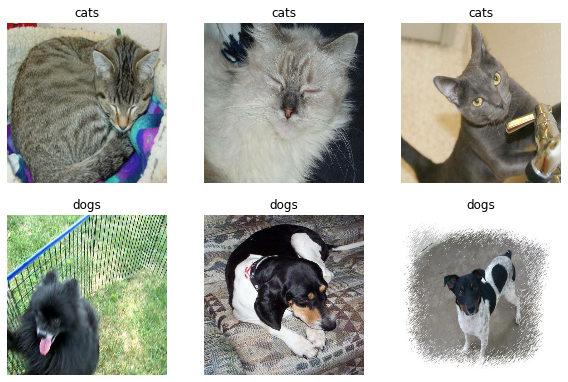

In [6]:
plt.figure(figsize=(10, 10))
cats=[]
dogs=[]
for images, labels in train_dataset.take(1):
    for i in range(32):
        if class_names[labels[i]]=='cats':
            cats.append(images[i].numpy().astype("uint8"))
        if class_names[labels[i]]=='dogs':
            dogs.append(images[i].numpy().astype("uint8"))
for i in range(6):
    if i<3:
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(cats[i])
        plt.title("cats")
        plt.axis("off")
    else:
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(dogs[i])
        plt.title("dogs")
        plt.axis("off")

In [7]:
labels_iterator= train_dataset.unbatch().map(lambda image, label: label).as_numpy_iterator()

In [8]:
dogs_freq=0
cats_freq=0
for label in labels_iterator:
    if label ==0:
        cats_freq=cats_freq+1
    else:
        dogs_freq=dogs_freq+1
print("dogs_freq = ",dogs_freq)
print("cats_freq = ",cats_freq)

dogs_freq =  1000
cats_freq =  1000


In [9]:
from tensorflow.keras import datasets, layers, models

In [23]:
model1 = models.Sequential([
    layers.Conv2D(8, (9, 9), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.Conv2D(128, (4, 4), activation='relu'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)
])
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model1.fit(train_dataset, 
                     epochs=20, 
                     validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 2.0744 - accuracy: 0.5360 - val_loss: 0.6882 - val_accuracy: 0.5334
Epoch 2/20
63/63 [==============================] - 2s 23ms/step - loss: 0.6854 - accuracy: 0.5570 - val_loss: 0.6906 - val_accuracy: 0.5322
Epoch 3/20
63/63 [==============================] - 2s 23ms/step - loss: 0.6764 - accuracy: 0.5700 - val_loss: 0.6950 - val_accuracy: 0.5347
Epoch 4/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6572 - accuracy: 0.5955 - val_loss: 0.7369 - val_accuracy: 0.5285
Epoch 5/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6306 - accuracy: 0.6325 - val_loss: 0.7552 - val_accuracy: 0.5421
Epoch 6/20
63/63 [==============================] - 2s 23ms/step - loss: 0.5989 - accuracy: 0.6530 - val_loss: 0.7550 - val_accuracy: 0.5408
Epoch 7/20
63/63 [==============================] - 2s 24ms/step - loss: 0.5520 - accuracy: 0.6920 - val_loss: 0.8158 - val_accuracy: 0.5520
Epoch 8/20
63

In [85]:
model1 = models.Sequential([
    layers.Conv2D(8, (9, 9), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.Conv2D(128, (4, 4), activation='relu'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10) 
])

In [86]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
history = model1.fit(train_dataset, 
                     epochs=20, 
                     validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 2s 27ms/step - loss: 2.4323 - accuracy: 0.5140 - val_loss: 0.7010 - val_accuracy: 0.5050
Epoch 2/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6899 - accuracy: 0.5440 - val_loss: 0.6943 - val_accuracy: 0.5161
Epoch 3/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6770 - accuracy: 0.5600 - val_loss: 0.6952 - val_accuracy: 0.5309
Epoch 4/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6528 - accuracy: 0.5910 - val_loss: 0.7478 - val_accuracy: 0.5099
Epoch 5/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6242 - accuracy: 0.6320 - val_loss: 0.6984 - val_accuracy: 0.5656
Epoch 6/20
63/63 [==============================] - 2s 24ms/step - loss: 0.5924 - accuracy: 0.6750 - val_loss: 0.7328 - val_accuracy: 0.5730
Epoch 7/20
63/63 [==============================] - 2s 24ms/step - loss: 0.5552 - accuracy: 0.6980 - val_loss: 0.7477 - val_accuracy: 0.5594
Epoch 8/20
63

The accuracy of my model stabilized `between 58% and 60%` during training.  
My model did only `8%` better than the baseline.
Yes! There's overfitting in my model, the training accuracy is much higher than the validation accuracy.

Test for tf.keras.layers.RandomFlip() layer

In [27]:
filp_random=tf.keras.layers.RandomFlip('horizontal_and_vertical')

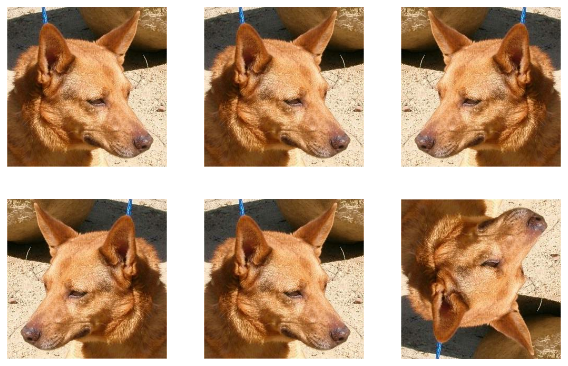

In [31]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = filp_random(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

Test for tf.keras.layers.RandomRotation() layer

In [38]:
rt_random=tf.keras.layers.RandomRotation(0.8)

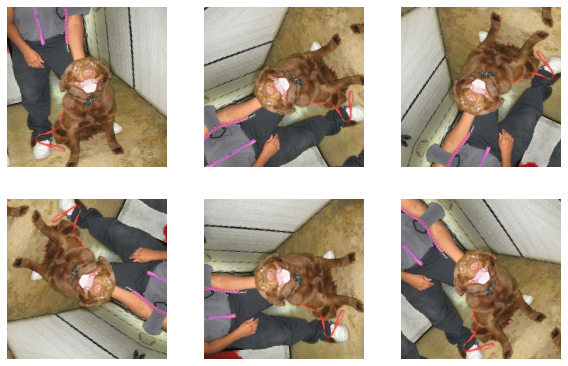

In [39]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = rt_random(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [65]:
model2 = models.Sequential([
    layers.RandomRotation(0.8),
    layers.RandomFlip('horizontal_and_vertical'),
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (4, 4), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10) 
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model2.fit(train_dataset, 
                     epochs=20, 
                     validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 2s 26ms/step - loss: 3.6026 - accuracy: 0.4925 - val_loss: 0.7080 - val_accuracy: 0.5099
Epoch 2/20
63/63 [==============================] - 2s 24ms/step - loss: 0.7129 - accuracy: 0.5355 - val_loss: 0.6737 - val_accuracy: 0.6200
Epoch 3/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6880 - accuracy: 0.5615 - val_loss: 0.6682 - val_accuracy: 0.5928
Epoch 4/20
63/63 [==============================] - 2s 23ms/step - loss: 0.6790 - accuracy: 0.5830 - val_loss: 0.6516 - val_accuracy: 0.6151
Epoch 5/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6749 - accuracy: 0.5920 - val_loss: 0.6878 - val_accuracy: 0.5371
Epoch 6/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6773 - accuracy: 0.5870 - val_loss: 0.6568 - val_accuracy: 0.6151
Epoch 7/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6611 - accuracy: 0.5970 - val_loss: 0.6479 - val_accuracy: 0.6300
Epoch 8/20
63

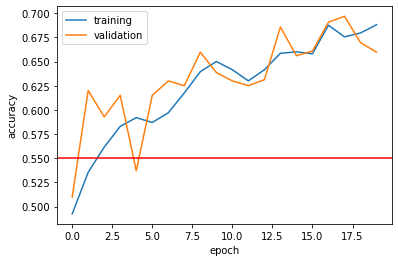

In [66]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.axhline(y=0.55, color='r', linestyle='-')
plt.legend()

The accuracy of my model 2 stabilized `between 64% and 66%` during training.  
My model 2 did  `4%` better than the model 1.  
There's no overfitting this time.

In [67]:
i = tf.keras.Input(shape=(160, 160, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(i)
preprocessor = tf.keras.Model(inputs = [i], outputs = [x])

In [91]:
model3 = models.Sequential([
    preprocessor,
    layers.RandomRotation(0.8),
    layers.RandomFlip('horizontal_and_vertical'),
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(2)
])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model3.fit(train_dataset, 
                     epochs=20, 
                     validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 3s 33ms/step - loss: 0.7176 - accuracy: 0.5295 - val_loss: 0.6633 - val_accuracy: 0.6002
Epoch 2/20
63/63 [==============================] - 2s 30ms/step - loss: 0.6616 - accuracy: 0.6000 - val_loss: 0.6820 - val_accuracy: 0.5532
Epoch 3/20
63/63 [==============================] - 2s 30ms/step - loss: 0.6459 - accuracy: 0.6235 - val_loss: 0.6578 - val_accuracy: 0.5817
Epoch 4/20
63/63 [==============================] - 2s 30ms/step - loss: 0.6212 - accuracy: 0.6390 - val_loss: 0.6167 - val_accuracy: 0.6696
Epoch 5/20
63/63 [==============================] - 2s 31ms/step - loss: 0.6016 - accuracy: 0.6630 - val_loss: 0.5674 - val_accuracy: 0.7079
Epoch 6/20
63/63 [==============================] - 2s 30ms/step - loss: 0.5782 - accuracy: 0.6950 - val_loss: 0.5736 - val_accuracy: 0.6993
Epoch 7/20
63/63 [==============================] - 2s 30ms/step - loss: 0.5821 - accuracy: 0.6835 - val_loss: 0.5751 - val_accuracy: 0.6869
Epoch 8/20
63

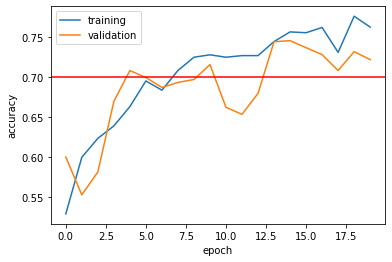

In [93]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.axhline(y=0.7, color='r', linestyle='-')
plt.legend()

The accuracy of my model 3 stabilized `between 71% and 73%` during training.  
My model 2 did  `16%` better than the model 1.  
There's no overfitting this time.

In [94]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

i = tf.keras.Input(shape=IMG_SHAPE)
x = base_model(i, training = False)
base_model_layer = tf.keras.Model(inputs = [i], outputs = [x])

9420800/9406464 [==============================] - 0s 0us/step


In [106]:
model4 = models.Sequential([
    preprocessor,
    layers.RandomRotation(0.8),
    layers.RandomFlip('horizontal_and_vertical'),
    base_model_layer,
    layers.GlobalMaxPooling2D(),
    layers.Dense(2)
])


In [108]:
model4.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 160, 160, 3)       0         
                                                                 
 random_rotation_45 (RandomR  (None, 160, 160, 3)      0         
 otation)                                                        
                                                                 
 random_flip_42 (RandomFlip)  (None, 160, 160, 3)      0         
                                                                 
 model_2 (Functional)        (None, 5, 5, 1280)        2257984   
                                                                 
 global_max_pooling2d_4 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_94 (Dense)            (None, 2)               

In [110]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [109]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model4.fit(train_dataset, 
                     epochs=20, 
                     validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 5s 57ms/step - loss: 0.9706 - accuracy: 0.7435 - val_loss: 0.1446 - val_accuracy: 0.9505
Epoch 2/20
63/63 [==============================] - 3s 44ms/step - loss: 0.4874 - accuracy: 0.8515 - val_loss: 0.1903 - val_accuracy: 0.9418
Epoch 3/20
63/63 [==============================] - 3s 45ms/step - loss: 0.3788 - accuracy: 0.8860 - val_loss: 0.0821 - val_accuracy: 0.9666
Epoch 4/20
63/63 [==============================] - 3s 47ms/step - loss: 0.3390 - accuracy: 0.8830 - val_loss: 0.0943 - val_accuracy: 0.9691
Epoch 5/20
63/63 [==============================] - 3s 46ms/step - loss: 0.3407 - accuracy: 0.8965 - val_loss: 0.0972 - val_accuracy: 0.9678
Epoch 6/20
63/63 [==============================] - 3s 44ms/step - loss: 0.2406 - accuracy: 0.9145 - val_loss: 0.1198 - val_accuracy: 0.9592
Epoch 7/20
63/63 [==============================] - 3s 44ms/step - loss: 0.2929 - accuracy: 0.9065 - val_loss: 0.1223 - val_accuracy: 0.9554
Epoch 8/20
63

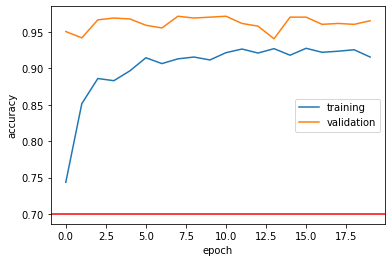

In [111]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.axhline(y=0.7, color='r', linestyle='-')
plt.legend()